In [ ]:
!pip install researchpy

In [56]:
import pandas as pd 
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
# Reading the data in a python environment 

In [58]:
df = pd.read_csv('/content/Sales_add.csv')


In [59]:
df.rename(columns = {'Sales_before_digital_add(in $)' : 'Sales_Before', 'Sales_After_digital_add(in $)' : 'Sales_After'}, inplace = True)
df.head(10)

,Month,Region,Manager,Sales_Before,Sales_After
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         22 non-null     object
 1   Region        22 non-null     object
 2   Manager       22 non-null     object
 3   Sales_Before  22 non-null     int64 
 4   Sales_After   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [61]:
df.describe()

,Sales_Before,Sales_After
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


## Checking whether there is an increase in sales after stepping into digital marketing using hypothesis testing

###Testing for homogeneity of variance for sales before and after stepping into digital marketing                                (95% confidence)

In [62]:
# Null Hypothesis H0 : Sales before and after don't have the same variance

In [63]:
# Alternate Hypothesis H1 : Sales before and after have the same variance 

In [64]:
group1 = df['Sales_Before']
group2 = df['Sales_After']
stats.levene(group1, group2, center='mean')


LeveneResult(statistic=5.171664124853503, pvalue=0.028130575490495715)

In [65]:
# The p-value is 0.028 which is lesser than the value of alpha, 0.05. Therefore, we reject the null hypothesis and continue our
# hypothesis test considering that both samples (Sales_Before and Sales_After) have equal variance

### Testing for normality of data 

In [66]:
# Null Hypothesis H0 : Dataset does not follow a normal distribution 
# Alternate Hypothesis H1 : Dataset follows a normal distribution 

In [67]:
from scipy.stats import shapiro
shapiro(df['Sales_Before'])


(0.9306764006614685, 0.12674309313297272)

In [68]:
# The p-value is 0.126, which is greater than the value of alpha 0.05. Therefore, we reject the null hypothesis and consider "Sales-Before" to be
# normally distributed

In [69]:
from scipy.stats import shapiro
shapiro(df['Sales_After'])

(0.9702125191688538, 0.7159563302993774)

In [70]:
# The p-value is 0.715, which is greater than the value of alpha 0.05. Therefore, we reject the null hypothesis and consider "Sales-After" to be
# normally distributed

In [71]:
# Visual Representation Of Normal Distribution (Sales_Before and Sales_After)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


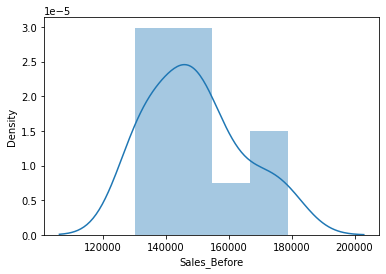

In [72]:
ax =sns.distplot(df['Sales_Before'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


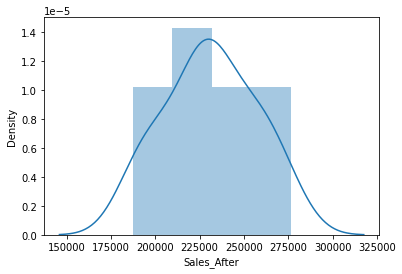

In [73]:
ax =sns.distplot(df['Sales_After'])

### Independent T Method For Hypothesis Testing

In [111]:
# Null Hypothesis H0: There is no statistically significant difference in sales before and after stepping into digital marketing
# Alternate Hypothesis H1: There is statistically significant difference in sales before and after stepping into digital marketing

In [112]:
stats.ttest_ind(group1,group2)


Ttest_indResult(statistic=-12.995084451110877, pvalue=2.614368006904645e-16)

In [113]:
# The p-value is significantly lower than the value of alpha, 0.05. Therefore, we reject the null hypothesis and can say that 
# digital marketing did improve sales

In [114]:
# Checking the hypothesis by plotting a boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


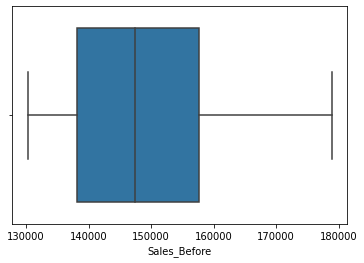

In [115]:
sns.boxplot(group1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


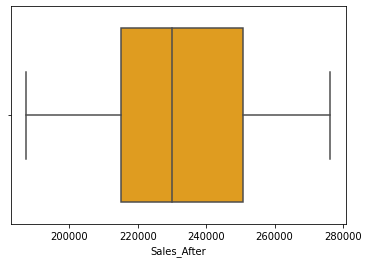

In [116]:
sns.boxplot(group2, color = 'orange')

In [117]:
# From the box plot, it is very evident that the sales have increased after digital marketing


## Checking whether there is any dependency between the features "Region" and "Manager"

In [81]:
# Proceeding with a test of independence - Chi Square Test 

In [82]:
# Null Hypothesis H0: There is no relationship between the features "Region" and "Manager", i.e., both are independent
# Alternate Hypothesis H1: There is a relationship between the features "Region" and "Manager"

In [83]:
df2 = pd.crosstab(df['Region'], df['Manager'], margins=False,values=df['Sales_After'], aggfunc='sum')
df2

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,1030437,656832,701262
Region - B,939851,231808,429436
Region - C,229336,643654,222106


In [108]:
# Converting the sales by different managers in different regions into percentage of total sales 

In [106]:
contigency_pct = pd.crosstab(df['Region'], df['Manager'], margins=False,values=df['Sales_After'],normalize ='all', aggfunc='sum', margins_name="Total Sales")
contigency_pct

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.202654,0.129178,0.137916
Region - B,0.184838,0.045589,0.084456
Region - C,0.045103,0.126586,0.043681


In [109]:
c, p, dof, expected = chi2_contingency(contigency_pct) 
p, dof

(0.9979137204823696, 4)

In [110]:
# The value of p obtained is 0.997 which is greater than the value of alpha, 0.05, and thus we accept the null hypothesis that there is 
# no statistical relation betweeen the feature "Region" and "Manager" in the dataset